<a href="https://colab.research.google.com/github/jufepalacios/Deep_Learning_Model_Garbage_bags_and_Potholes_Detection/blob/main/colab/mapa_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Leer las ubicaciones a partir de un archivo txt

In [ ]:
df=pd.read_csv('ubicaciones_pasto.txt',';')
huecos_x=[]
huecos_y=[]

bolsas_x=[]
bolsas_y=[]

for row in df.iterrows():
    actual=row[1]
    huecos=actual['huecos']
    bolsas=actual['bolsas']
    latitud=actual['latitud']
    longitud=actual['longitud']
    
    for i in range(int(huecos)):
        huecos_x.append(longitud)
        huecos_y.append(latitud)
        
    for i in range(int(bolsas)):
        bolsas_x.append(longitud)
        bolsas_y.append(latitud)
    

### Generar la distribución de los datos

In [ ]:
#POINT DATASET
x=huecos_x
y=huecos_y


#DEFINE GRID SIZE AND RADIUS(h)
grid_size=0.0001
h=0.003

#GETTING X,Y MIN AND MAX
x_min=-77.296183
x_max=-77.255034
y_min=1.18448
y_max=1.236420

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='Reds')
#plt.plot(x,y,'ro')
#plt.colorbar()
plt.axis('off')
plt.show()
plt.savefig('test_heat.png')

In [ ]:
####################################
####Se debe guardar la imagen a mano
####################################

In [ ]:
img1=cv2.imread('pasto.png')
img2=cv2.imread('heat_pasto_huecos.png')
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]),interpolation=cv2.INTER_CUBIC)

In [ ]:
print(img1.shape)
print(img2.shape)

(829, 660, 3)
(829, 660, 3)


In [ ]:
white=np.where((img2[:,:,0]==0) & (img2[:,:,1]==0) & (img2[:,:,2]==0))

img2[white]=(250,250,250)

'\nfor fila in img2:\n  for pixel in fila:\n    print(pixel)\n'

In [ ]:
dst = cv2.addWeighted(img1,0.2,img2,0.7,0)
im_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

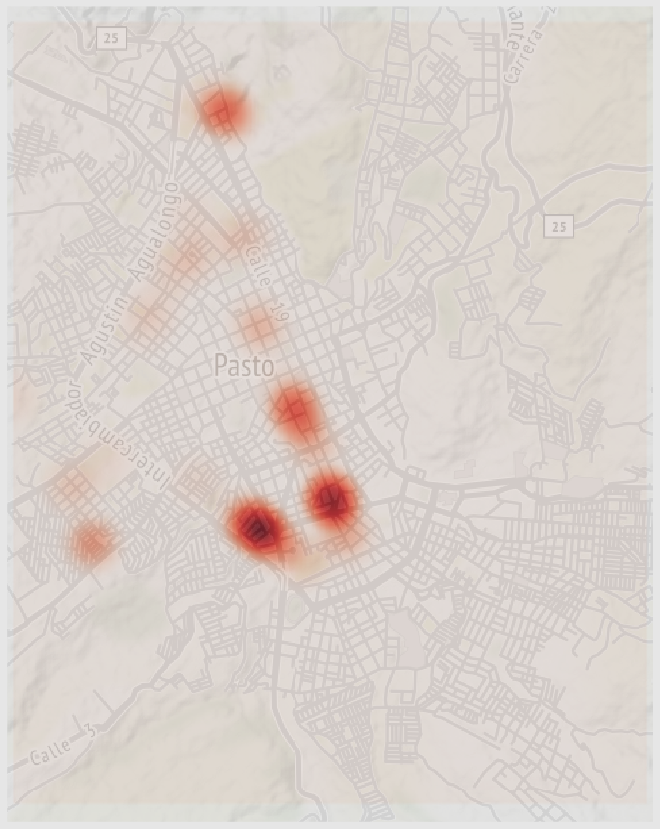

In [ ]:
cv2_imshow(dst)


## Neiva

In [ ]:
df=pd.read_csv('ubicaciones_neiva.txt',';')
huecos_x=[]
huecos_y=[]

bolsas_x=[]
bolsas_y=[]

for row in df.iterrows():
    actual=row[1]
    huecos=actual['huecos']
    bolsas=actual['bolsas']
    latitud=actual['latitud']
    longitud=actual['longitud']
    
    for i in range(int(huecos)):
        huecos_x.append(longitud)
        huecos_y.append(latitud)
        
    for i in range(int(bolsas)):
        bolsas_x.append(longitud)
        bolsas_y.append(latitud)
    

In [ ]:
#POINT DATASET
x=huecos_x
y=huecos_y


#DEFINE GRID SIZE AND RADIUS(h)
grid_size=0.0001
h=0.0005

#GETTING X,Y MIN AND MAX
x_min=-75.304117
x_max=-75.239340
y_min=2.915
y_max=2.981859

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    print(j/len(xc))
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='Blues')
#plt.plot(x,y,'ro')
#plt.colorbar()
plt.axis('off')
print('h:',h)
plt.show()

In [ ]:
img1=cv2.imread('neiva.png')
img2=cv2.imread('combinados001.png')
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]),interpolation=cv2.INTER_CUBIC)

In [ ]:
print(img1.shape)
print(img2.shape)

(829, 803, 3)
(829, 803, 3)


In [ ]:
white=np.where((img2[:,:,0]==0) & (img2[:,:,1]==0) & (img2[:,:,2]==0))

#Turn black pixels to white and vice versa
img2[white]=(250,250,250)
"""
for fila in img2:
  for pixel in fila:
    print(pixel)
"""

'\nfor fila in img2:\n  for pixel in fila:\n    print(pixel)\n'

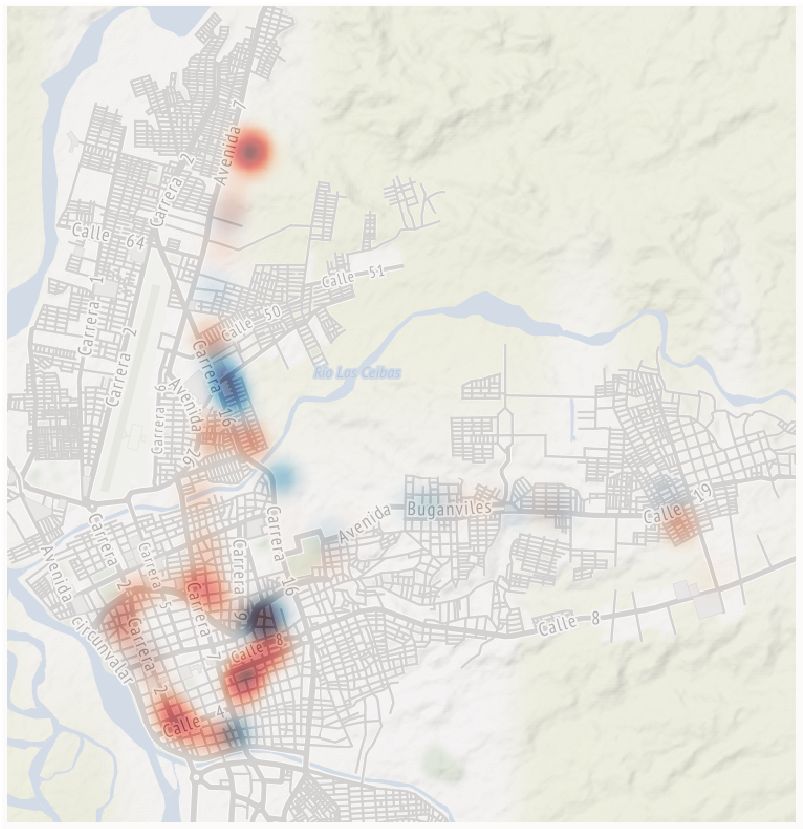

In [ ]:
img1=cv2.imread('neiva.png')
img2=cv2.imread('combinados003_mejorado.png')
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]),interpolation=cv2.INTER_CUBIC)
dst = cv2.addWeighted(img1,0.4,img2,0.6,0)
im_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2_imshow(dst)

## Pasto

In [ ]:
df=pd.read_csv('ubicaciones_pasto.txt',';')
huecos_x=[]
huecos_y=[]

bolsas_x=[]
bolsas_y=[]

for row in df.iterrows():
    actual=row[1]
    huecos=actual['huecos']
    bolsas=actual['bolsas']
    latitud=actual['latitud']
    longitud=actual['longitud']
    
    for i in range(int(huecos)):
        huecos_x.append(longitud)
        huecos_y.append(latitud)
        
    for i in range(int(bolsas)):
        bolsas_x.append(longitud)
        bolsas_y.append(latitud)
    

In [ ]:
#POINT DATASET
x=bolsas_x
y=bolsas_y

[-77.296183,-77.255034,1.18448,1.236420]

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=0.0001
h=0.002

#GETTING X,Y MIN AND MAX
x_min=-77.296183
x_max=-77.255034
y_min=1.18448
y_max=1.23642

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    print(j/len(xc))
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='Reds')
#plt.plot(x,y,'ro')
#plt.colorbar()
plt.axis('off')
print('h:',h)
plt.show()

In [ ]:
img1=cv2.imread('pasto.png')
img2=cv2.imread('combinados_pasto.png')
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]),interpolation=cv2.INTER_CUBIC)

In [ ]:
white=np.where((img2[:,:,0]==0) & (img2[:,:,1]==0) & (img2[:,:,2]==0))

img2[white]=(250,250,250)

'\nfor fila in img2:\n  for pixel in fila:\n    print(pixel)\n'

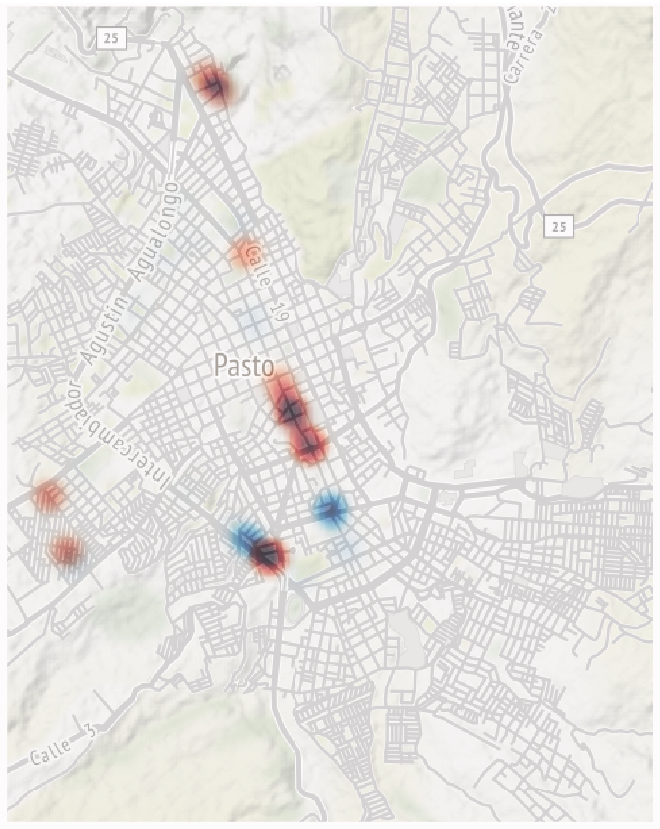

In [ ]:
img1=cv2.imread('pasto.png')
img2=cv2.imread('combinados_pasto.png')
img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]),interpolation=cv2.INTER_CUBIC)
dst = cv2.addWeighted(img1,0.4,img2,0.6,0)
im_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2_imshow(dst)